In [44]:
# Ref
# Python control code
# https://jckantor.github.io/CBE30338/05.03-Creating-Bode-Plots.html
# Buck converter related equations
# https://www.bilibili.com/video/BV12E41177wW?share_source=copy_web
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt

import pylab as pl


from scipy import signal
import control

def Buck_Gvd(L,C,Vg,D,R):
    """
    This function defines the transfer function between 
    the control variable D and the output voltage V
    Input@ L  inductance in H
    Input@ C  output capacitance in F
    Input@ Vg input voltage in Volt
    Input@ D  duty ratio 
    Input@ R  output resistance in ohm
    Output@sys is the transfer function Gvd
                                L
                    1 -    ---------- *s
             Vg            (R * D'^2)
    Gvd(s) = --   * ---------------------------------
             D'^2           L             L * C
                    1 + ---------- * s + ------ * s^2
                        (R * D'^2)         D'^2
    """
    D_prime = 1 - D
    D_prime_square = np.square(1-D)
    as1 = (Vg/D_prime_square)*(-1*L/(R*D_prime_square))
    as0 = (Vg/D_prime_square)
    bs2 = L*C/D_prime_square
    bs1 = L/R*D_prime_square
    bs0 = 1
    sys = control.tf([as1, as0], [bs2, bs1, bs0])
    return sys

def Buck_Gid(L,C,Vo,D,R):
    """
    This function defines the transfer function between 
    the control variable D and the inductor current IL
    Input@ L  inductance in H
    Input@ C  output capacitance in F
    Input@ Vo output voltage in Volt
    Input@ D  duty ratio 
    Input@ R  output resistance in ohm
    Output@sys is the transfer function Gid
                             2*Vo
                 - Vo*C*s  - ----
                              R
    Gid(s) =  -----------------------------
                      L            
              D'^2 + --- * s + L * C * s^2
                      R        
    """
    D_prime = 1 - D
    D_prime_square = np.square(1-D)
    as1 = (-Vo*C)
    as0 = (-2*Vo/R)
    bs2 = L*C
    bs1 = L/R
    bs0 = D_prime_square
    sys = control.tf([as1, as0], [bs2, bs1, bs0])
    return sys

def Buck_Gvi(L,C,D,R):
    """
    This function defines the transfer function between 
    the inductor current IL and the output voltage vo
    Input@ L  inductance in H
    Input@ C  output capacitance in F
    Input@ D  duty ratio 
    Input@ R  output resistance in ohm
    Output@sys is the transfer function Gvi
    
                 - L*s  - D'^2 * R
    Gvi(s) =  -----------------------------           
             - D'^2 * R * C * s - 2 * D'^2     
    """
    D_prime = 1 - D
    D_prime_square = np.square(1-D)
    as1 = (-L)
    as0 = (-D_prime_square * R)
    bs1 = D_prime_square * R * C
    bs0 = 2 * D_prime_square
    sys = control.tf([as1, as0], [bs1, bs0])
    return sys

def Buck_Gi(Kip, Kii):
    """
    This function defines the transfer function of 
    the current control loop
    Input@ Kip proportional gain
    Input@ Kii intergation gain
    Output@sys is the transfer function Gi
                 Kip * s + Kii
    Gvi(s) =  ---------------------         
                       s     
    """
    as1 = Kip
    as0 = Kii
    bs1 = 1
    bs0 = 0
    sys = control.tf([as1, as0], [bs1, bs0])
    return sys

Crossover freq =  10.0  rad/sec
Gain at crossover =  0.03420235567628716


Text(0.5, 1.0, 'Crossover Frequency = 10 rad/sec')

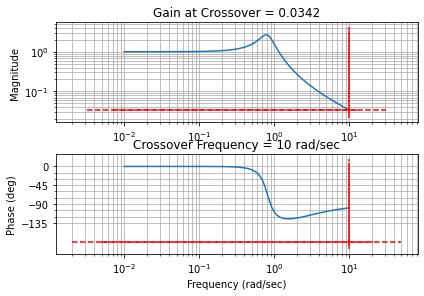

In [45]:
sys = signal.TransferFunction([1], [1, 1])
sys = Buck_Gvd(1e-5, 100e-6, 10, 0.3, 2)
mag,phase,omega = control.bode(Gp,w);
plt.tight_layout()
#ax1,ax2 = plt.gcf().axes     # get subplot axes

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

print('Crossover freq = ', wc, ' rad/sec')
print('Gain at crossover = ', Kcu)


plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[Kcu,Kcu],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Gain at Crossover = {0:.3g}".format(Kcu))

plt.sca(ax2)                 # phase plot
plt.plot(plt.xlim(),[-180,-180],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Crossover Frequency = {0:.3g} rad/sec".format(wc))
#sys = Buck_Gid(1e-5, 100e-6, 10, 0.3, 2)
#sys = Buck_Gvi(1e-5, 100e-6, 0.3, 2)
#sys = Buck_Gi(1e-5, 1e-6)

#w, mag, phase = signal.bode(sys)
#plt.figure()
#plt.semilogx(w, mag)    # Bode magnitude plot
#plt.figure()
#plt.semilogx(w, phase)  # Bode phase plot
#plt.show()

In [43]:
# help(Buck_Gvd)